In [1]:
import os
import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from P02_MSIE.T06_exp.vrptw_v9 import VRPTW

CURRENT_DIR = os.getcwd()
print(f"Current Directory: {CURRENT_DIR}")
datetime_now = datetime.now().strftime("%Y%m%d_%H%M%S")
os.makedirs(f"{CURRENT_DIR}/_tmp", exist_ok=True)


Current Directory: c:\Users\admin\Coding\research\rl-meta-test\src\P02_MSIE\T06_exp


In [2]:
folder = "R_20251113_123943"
it = 18727

In [3]:
with open(f"./save_models/{folder}/exp_{it:05d}.pkl", "rb") as f:
    exp = pickle.load(f)
exp.tail()

,action,reward,done,F,CR,MG,best_solution,convergence_rate,std_pop,total_iteration,best_trial_fitness,std_trial_fitness,patience_ratio,idx_iteration,patience_remaining,TimeLimit.truncated
313,"[0.71192354, 0.24994431, 0.15816459]",1.561483e-06,False,0.711924,0.249944,0.158165,0.532161,1.0,0.432158,3140,1.135861,0.189387,0.125,3139,50,False
314,"[0.367653, 0.13785401, 0.5466647]",9.470874e-07,False,0.367653,0.137854,0.546665,0.532161,1.0,0.342232,3150,0.778352,0.290513,0.100,3149,40,False
315,"[0.101229355, 0.021641443, 0.1019046]",5.744375e-07,False,0.101229,0.021641,0.101905,0.532161,1.0,0.460041,3160,0.532161,0.460041,0.075,3159,30,False
316,"[0.75088435, 0.06538488, 0.49638098]",3.484140e-07,False,0.750884,0.065385,0.496381,0.532161,1.0,0.401299,3170,0.770190,0.307029,0.050,3169,20,False
317,"[0.87903345, 0.02799434, 0.049052447]",2.113238e-07,False,0.879033,0.027994,0.049052,0.532161,1.0,0.446315,3180,0.826868,0.328519,0.025,3179,10,False


In [4]:
with open(f"./save_models/{folder}/vrp_{it:05d}.pkl", "rb") as f:
    info = pickle.load(f)

global_solution_history = info["global_solution_history"]
population = info["population"]
fitness_trial_history = info["fitness_trial_history"]
vrptw = info["vrptw"]
episode_reward = info["episode_reward"]
episode_length = info["episode_length"]
best_solution = info["best_solution"]
print(f"Episode Reward: {episode_reward}, Episode Length: {episode_length}, Best Solution: {best_solution}")

Episode Reward: 744.312856, Episode Length: 319, Best Solution: 0.5321607193298517


Best global solution: 0.5321607193298517


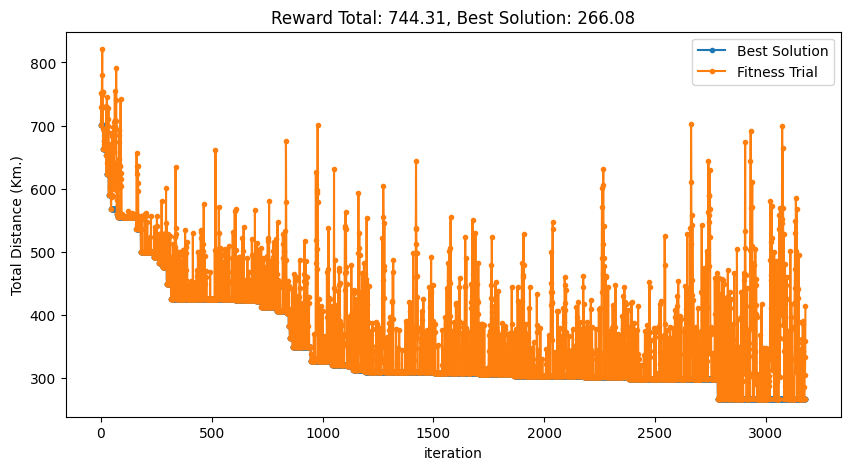

In [5]:
print(f"Best global solution: {min(global_solution_history)}")
# Plot results
fig, ax = plt.subplots(1, figsize=(10, 5))
x = np.arange(len(global_solution_history))
y1 = np.array(global_solution_history) * vrptw.solution_scale_factor
y2 = np.array(fitness_trial_history) * vrptw.solution_scale_factor
ax.plot(x, y1, marker=".", label="Best Solution")
ax.plot(x, y2, marker=".", label="Fitness Trial")
ax.set(
    xlabel="iteration",
    ylabel="Total Distance (Km.)",
    title=f"Reward Total: {episode_reward:.2f}, Best Solution: {best_solution*vrptw.solution_scale_factor:.2f}",
)
ax.legend()
fig.savefig(f"{CURRENT_DIR}/_tmp/plot_{datetime_now}_{it:05d}.png",
    dpi=300,
)


In [6]:
current_cost = [vrptw.objective_func(p) for p in population]
idx_min = np.argmin(current_cost)
print(current_cost[idx_min])

266.0803596649258


[0.95577652 0.86077086 0.19962806 0.74934804 0.18678679 0.70662334
 0.57515636 0.60888753 0.6776293  0.20162799 0.6336656  0.56888697
 0.3604466  0.54674646 0.63249371 0.54255314 0.46123489 0.52062398
 0.54088817 0.         0.34356453 0.15778363 0.30528852 0.
 0.05486882 0.97491437 0.20771225 0.33343389 0.70590743 0.28886987
 0.58734145 0.23470829 0.51369154 0.46417874 0.67800952 0.45780206
 0.24987302 0.40344629 0.07034437 0.73561241 1.         0.18100007
 0.70548153 0.47763674 0.5907926  1.         0.5963313  0.31427241
 0.92688276 0.82331696]


<Axes: >

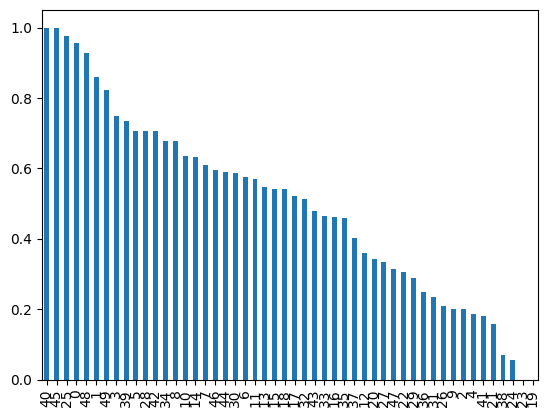

In [7]:
# How to visualize population
best_individual = population[idx_min]
print(best_individual)
pd.Series(best_individual).sort_values(ascending=False).plot.bar()

In [8]:
vrptw.objective_func(population[idx_min])

266.0803596649258

In [9]:
exp.columns

Index(['action', 'reward', 'done', 'F', 'CR', 'MG', 'best_solution',
       'convergence_rate', 'std_pop', 'total_iteration', 'best_trial_fitness',
       'std_trial_fitness', 'patience_ratio', 'idx_iteration',
       'patience_remaining', 'TimeLimit.truncated'],
      dtype='object')

<Axes: >

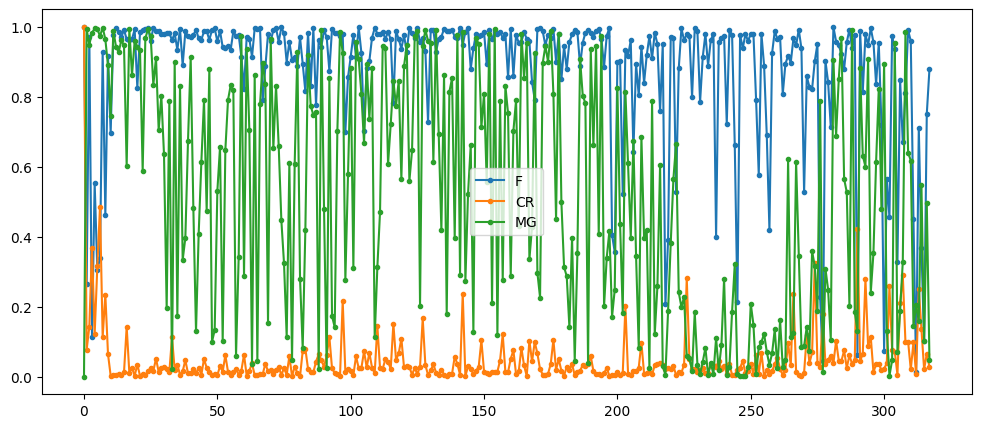

In [10]:
exp[["F", "CR", "MG"]].plot(figsize=(12,5), marker=".")